In [148]:
from scipy import stats
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



In [86]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [96]:

%ls

dataset_climatico.csv


In [97]:
df=pd.read_csv("dataset_climatico.csv")
df.head(5)

,data_osservazione,temperatura_media,precipitazioni,umidita,velocita_vento,stazione_meteorologica
0,2022-01-01,3.345032,16.712921,66.028263,75.580829,Stazione Napoli
1,2022-01-02,34.640506,9.669180,52.891332,22.567745,Stazione Roma
2,2022-01-03,1.223902,17.623765,82.054851,59.792104,Stazione Milano
3,2022-01-04,-5.234223,18.328380,48.785933,2.510954,Stazione Milano
4,2022-01-05,32.792867,5.431022,64.595705,83.449843,Stazione Milano


In [98]:
df.dropna(inplace=True)

In [99]:
normalizzazione_colonne = ["temperatura_media", "precipitazioni", "umidita", "velocita_vento"]
df[normalizzazione_colonne] = stats.zscore(df[normalizzazione_colonne])

In [100]:
df.to_csv('out.csv', index=False)

In [128]:
df=pd.read_csv("out.csv")

In [129]:
#statistiche del dataframe
df.describe()

,temperatura_media,precipitazioni,umidita,velocita_vento
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-1.030287e-16,-1.421085e-17,-1.776357e-17,-6.927792e-17
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.700981e+00,-1.737158e+00,-1.759738e+00,-1.677238e+00
25%,-8.292648e-01,-8.548148e-01,-8.107767e-01,-8.729122e-01
50%,-3.835692e-02,1.915798e-02,-3.205923e-02,-3.371982e-02
75%,8.747672e-01,8.947598e-01,8.731745e-01,8.542465e-01
max,1.685411e+00,1.678695e+00,1.714516e+00,1.830563e+00


In [130]:
type("data_osservazione")

str

In [131]:
#cambio datatype da stringa a data
df['data_osservazione'] = pd.to_datetime(df['data_osservazione'])

In [132]:
#impostazione dell'indice con la data
df.set_index("data_osservazione", inplace=True)

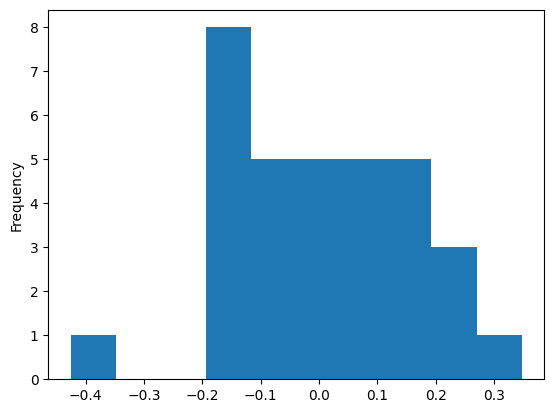

In [121]:
#istogramma della media della temperatura media ragrruppato per mese
d1= df.resample("M")["temperatura_media"].mean().plot(kind= "hist")

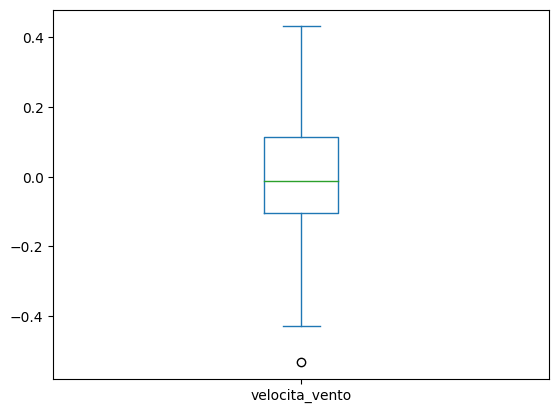

In [135]:
d2= df.resample("M")["velocita_vento"].mean().plot(kind= "box")

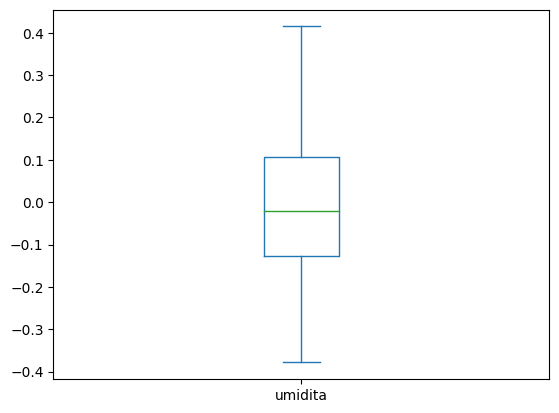

In [150]:
d3= df.resample("M")["umidita"].mean().plot(kind= "box")

Analisi di Correlazione: Utilizzare una heatmap per visualizzare la correlazione tra le diverse variabili meteorologiche. Identificare eventuali correlazioni significative (es. tra temperatura e umidità).

In [142]:
corr = df.corr()
print(corr)

                   temperatura_media  precipitazioni   umidita  velocita_vento
temperatura_media           1.000000       -0.003993 -0.052520       -0.021765
precipitazioni             -0.003993        1.000000  0.026664       -0.001567
umidita                    -0.052520        0.026664  1.000000        0.055076
velocita_vento             -0.021765       -0.001567  0.055076        1.000000


<ipython-input-142-add040053286>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


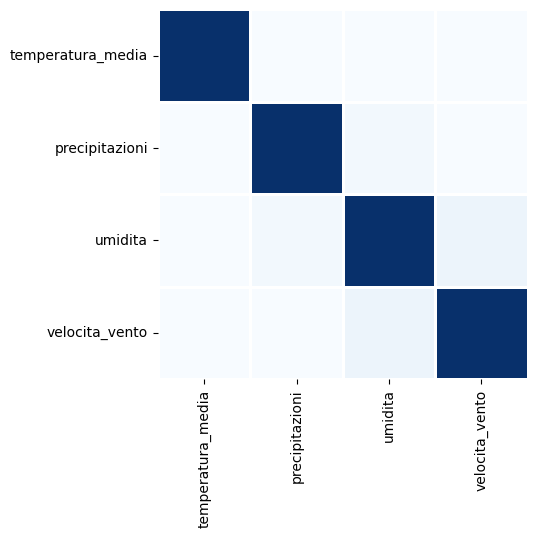

In [149]:
ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
plt.show()

Interpretazione dei Risultati: Scrivere un breve report che riassume i risultati dell'analisi, evidenziando eventuali tendenze o correlazioni interessanti.



*   La temperatura rispetto alle altre variabili è inversamente proporzionale

*   Le precipitazioni ha una correlazione bassa con l'umidità ed è inversamente proporzionale con le altre variabili (temperatura e velocità del vento)

*   L'umidità ha invece una  bassa correlazione con precipitazioni   umidita  velocita_vento e inversamente proporzionale con la temperatura
*   Il vento ha una bassa correlazione con l'umidità e inversamente proporzionale alla temperatura e precipitazioni








